In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/train.csv')
print(data.head())

# 각 열에서 NULL 값의 개수를 확인
null_counts = data.isnull().sum()
print("Columns with NULL values:")
print(null_counts)

            id                                               text  sentiment
0  TRAIN_00000  @SenWarren The problem with your massively fla...          2
1  TRAIN_00001  #Tweetlord is a twitter role playing game! Che...          1
2  TRAIN_00002  I just slammed my elbow into a fridge, I did n...          2
3  TRAIN_00003                          _beckett Thanks so much !          1
4  TRAIN_00004                     My gauge fell out on superman           2
Columns with NULL values:
id           0
text         0
sentiment    0
dtype: int64
Sentiment Percentage:
sentiment
2    62.80
1    25.15
0    12.05
Name: count, dtype: float64


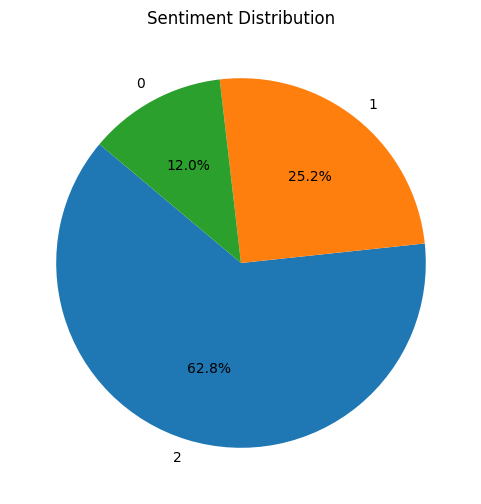

In [5]:
import matplotlib.pyplot as plt

# 'sentiment' 열 값별 데이터 개수를 계산
sentiment_counts = data['sentiment'].value_counts()

# 각 sentiment 값의 백분율을 계산
percentage = sentiment_counts / len(data) * 100

# 원형 그래프 생성
plt.figure(figsize=(6, 6))
plt.pie(percentage, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')

# 그래프 표시
plt.show()

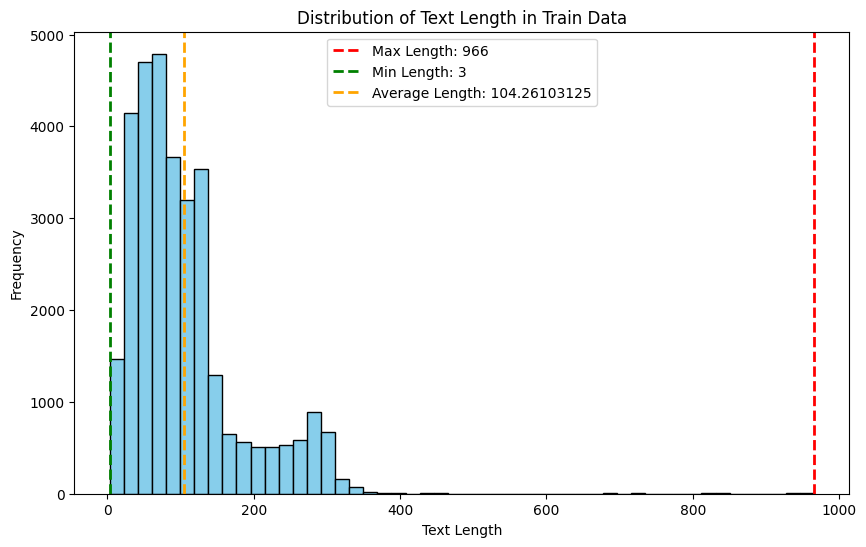

In [4]:
# 'text' 열의 길이를 계산하여 새로운 열 'text_length'를 추가
data['text_length'] = data['text'].apply(len)

# 최대, 최소, 평균 길이를 계산
max_length = data['text_length'].max()
min_length = data['text_length'].min()
average_length = data['text_length'].mean()

# 시각화를 위한 그래프를 생성
plt.figure(figsize=(10, 6))

# 히스토그램
plt.hist(data['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=max_length, color='red', linestyle='dashed', linewidth=2, label=f'Max Length: {max_length}')
plt.axvline(x=min_length, color='green', linestyle='dashed', linewidth=2, label=f'Min Length: {min_length}')
plt.axvline(x=average_length, color='orange', linestyle='dashed', linewidth=2, label=f'Average Length: {average_length}')

# 그래프 제목과 레이블을 설정
plt.title('Distribution of Text Length in Train Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# 범례추가
plt.legend()
plt.show()


In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("sileod/deberta-v3-base-tasksource-nli")

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Average Token Count: 28
Maximum Token Count: 331
Minimum Token Count: 1


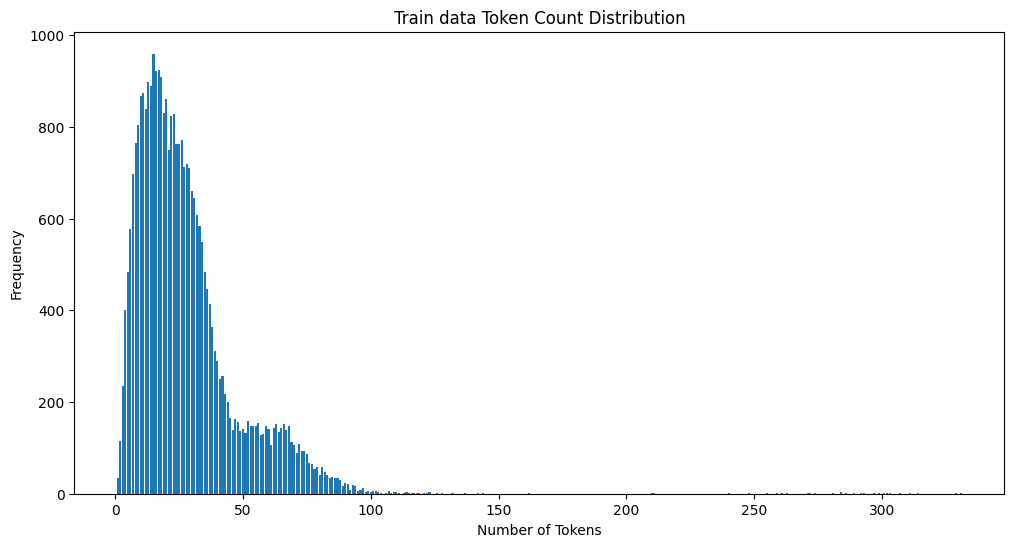

In [26]:
# text 열의 각 행을 토큰으로 분할하여 토큰 수 계산
token_counts = []
for text in data['text']:
    tokens = tokenizer.tokenize(text)
    token_counts.append(len(tokens))

# 평균 토큰 수 계산
average_token_count = sum(token_counts) / len(token_counts)
print(f"Average Token Count: {round(average_token_count)}")

# 토큰 수의 분포 확인
token_counts_series = pd.Series(token_counts)
token_distribution = token_counts_series.value_counts()

# 최대 및 최소 토큰 수 출력
max_token_count = token_counts_series.max()
min_token_count = token_counts_series.min()
print(f"Maximum Token Count: {max_token_count}")
print(f"Minimum Token Count: {min_token_count}")

# 분포를 그래프로 그리기
plt.figure(figsize=(12, 6))
plt.bar(token_distribution.index, token_distribution.values)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Train data Token Count Distribution')
plt.show()

Average Token Count: 28
Maximum Token Count: 354
Minimum Token Count: 1


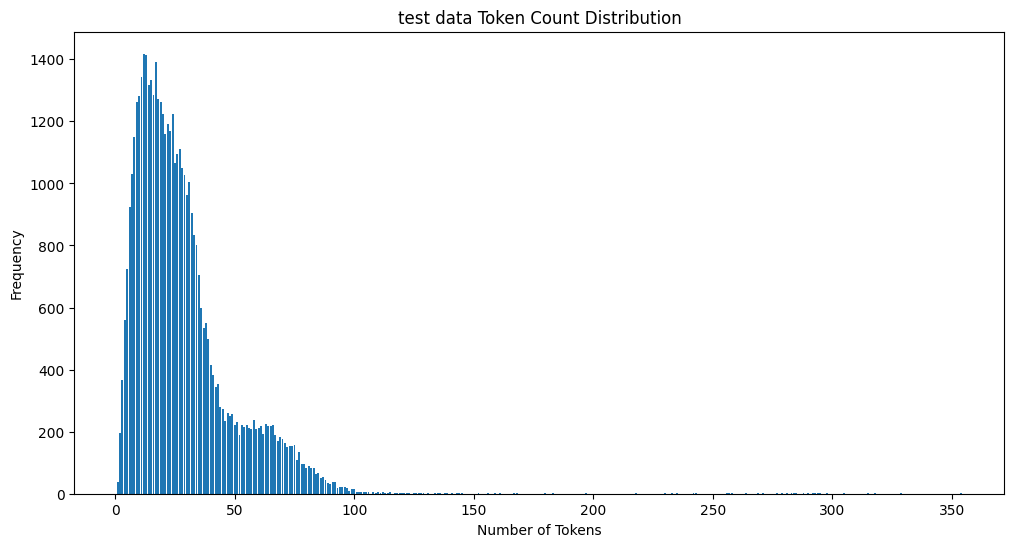

In [25]:
# Test data
test_data = pd.read_csv('data/test.csv')

# text 열의 각 행을 토큰으로 분할하여 토큰 수 계산
token_counts = []
for text in test_data['text']:
    tokens = tokenizer.tokenize(text)
    token_counts.append(len(tokens))

# 평균 토큰 수 계산
average_token_count = sum(token_counts) / len(token_counts)
print(f"Average Token Count: {round(average_token_count)}")

# 토큰 수의 분포 확인
token_counts_series = pd.Series(token_counts)
token_distribution = token_counts_series.value_counts()

# 최대 및 최소 토큰 수 출력
max_token_count = token_counts_series.max()
min_token_count = token_counts_series.min()
print(f"Maximum Token Count: {max_token_count}")
print(f"Minimum Token Count: {min_token_count}")

# 평균 토큰 수 계산
average_token_count = sum(token_counts) / len(token_counts)

# 분포를 그래프로 그리기
plt.figure(figsize=(12, 6))
plt.bar(token_distribution.index, token_distribution.values)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('test data Token Count Distribution')
plt.show()